# Isaac Sim on Google Colab

Unofficial instructions for running headless [Isaac Sim](https://docs.isaacsim.omniverse.nvidia.com/latest/index.html) and [Isaac Lab](https://isaac-sim.github.io/IsaacLab/main/index.html) on Google Colab.

This setup is for demo purposes only, using various hacks to run Isaac Sim on Colab. Serious development is not recommended, as Colab is not officially supported.

## 1. Install Isaac Sim and Isaac Lab

**Make sure to first change to GPU runtime by `Runtime > Change runtime type` to `T4 GPU`.**

> Please note that error messages indicating Isaac Sim was terminated due to segmentation faults or Python fatal errors can be ignored.

In [ ]:
# Install Isaac Sim 4.5 and Isaac Lab 2.1.0. This process takes about 10 mins to complete.
!wget -O install-isaac-sim-4.5.sh https://raw.githubusercontent.com/j3soon/isaac-sim-colab/main/scripts/install-isaac-sim-4.5.sh
!time bash install-isaac-sim-4.5.sh
!wget -O install-isaac-lab-2.1.0.sh https://raw.githubusercontent.com/j3soon/isaac-sim-colab/main/scripts/install-isaac-lab-2.1.0.sh
!time bash install-isaac-lab-2.1.0.sh

--2025-04-27 14:40:19--  https://raw.githubusercontent.com/j3soon/isaac-sim-colab/main/scripts/install-isaac-sim-4.5.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4517 (4.4K) [text/plain]
Saving to: ‘install-isaac-sim-4.5.sh’

install-isaac-sim-4 100%[===================>]   4.41K  --.-KB/s    in 0s      

2025-04-27 14:40:19 (53.1 MB/s) - ‘install-isaac-sim-4.5.sh’ saved [4517/4517]

--2025-04-27 14:40:19--  https://raw.githubusercontent.com/j3soon/colab-python-version/main/scripts/py310.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 2

In [ ]:
# Install common packages
!pip install seaborn tbparse

## 2. Train an Agent in the Cartpole Environment

In [ ]:
# Set environment variables
# Ref: https://docs.isaacsim.omniverse.nvidia.com/latest/installation/install_python.html#running-isaac-sim
import os
os.environ["OMNI_KIT_ACCEPT_EULA"] = "YES"

# Train agent in Cartpole env
# Ref: https://isaac-sim.github.io/IsaacLab/main/source/overview/reinforcement-learning/rl_existing_scripts.html
!cd IsaacLab && time python scripts/reinforcement_learning/rl_games/train.py --task Isaac-Cartpole-v0 --headless

[INFO][AppLauncher]: Using device: cuda:0
[INFO][AppLauncher]: Loading experience file: /content/IsaacLab/apps/isaaclab.python.headless.kit
[Warning] [simulation_app.simulation_app] Modules: ['omni.kit_app'] were loaded before SimulationApp was started and might not be loaded correctly.
[Warning] [simulation_app.simulation_app] Please check to make sure no extra omniverse or pxr modules are imported before the call to SimulationApp(...)
[Warning] [simulation_app.simulation_app] fast shutdown not supported with jupyter notebooks
[Info] [carb] Logging to file: /usr/local/lib/python3.10/site-packages/omni/logs/Kit/Isaac-Sim/4.5/kit_20250427_145056.log
2025-04-27 14:50:56 s] [Warning] [omni.kit.app.plugin] No crash reporter present, dumps uploading isn't available.
2025-04-27 14:50:56 s] [Warning] [omni.ext.plugin] [ext: rendering_modes] Extensions config 'extension.toml' doesn't exist '/content/IsaacLab/apps/rendering_modes' or '/content/IsaacLab/apps/rendering_modes/config'
2025-04-27 14

In [ ]:
# Set environment variables
# Ref: https://docs.isaacsim.omniverse.nvidia.com/latest/installation/install_python.html#running-isaac-sim
import os
os.environ["OMNI_KIT_ACCEPT_EULA"] = "YES"

# Record agent in Cartpole env
# Ref: https://isaac-sim.github.io/IsaacLab/main/source/overview/reinforcement-learning/rl_existing_scripts.html
!cd IsaacLab && python scripts/reinforcement_learning/rl_games/play.py --task Isaac-Cartpole-v0 --headless --video --video_length 200

# Need to click the `Stop` button twice after recording finished (wait for the video file), not sure why the script won't end automatically by itself.

[INFO][AppLauncher]: Using device: cuda:0
[INFO][AppLauncher]: Loading experience file: /content/IsaacLab/apps/isaaclab.python.headless.rendering.kit
[Warning] [simulation_app.simulation_app] Modules: ['omni.kit_app'] were loaded before SimulationApp was started and might not be loaded correctly.
[Warning] [simulation_app.simulation_app] Please check to make sure no extra omniverse or pxr modules are imported before the call to SimulationApp(...)
[Warning] [simulation_app.simulation_app] fast shutdown not supported with jupyter notebooks
Loading user config located at: '/usr/local/lib/python3.10/site-packages/omni/data/Kit/Isaac-Sim/4.5/user.config.json'
[Info] [carb] Logging to file: /usr/local/lib/python3.10/site-packages/omni/logs/Kit/Isaac-Sim/4.5/kit_20250427_145503.log
2025-04-27 14:55:03 s] [Warning] [omni.kit.app.plugin] No crash reporter present, dumps uploading isn't available.
2025-04-27 14:55:03 s] [Warning] [omni.ext.plugin] [ext: rendering_modes] Extensions config 'extens

In [ ]:
import glob
from IPython.display import Video

pattern = "/content/IsaacLab/logs/rl_games/cartpole/*/videos/play/rl-video-step-0.mp4"
files = glob.glob(pattern)

# Show Cartpole recording
Video(files[0], embed=True)

**Please refresh this page by pressing F5, and then execute the following cell without running the first one.**

In [ ]:
import sys
print("User Current Version:-", sys.version)

User Current Version:- 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]


In [ ]:
from tbparse import SummaryReader
reader = SummaryReader("/content/IsaacLab/logs/rl_games/cartpole")
df = reader.scalars

Text(0.5, 1.0, 'Reward vs. Time')

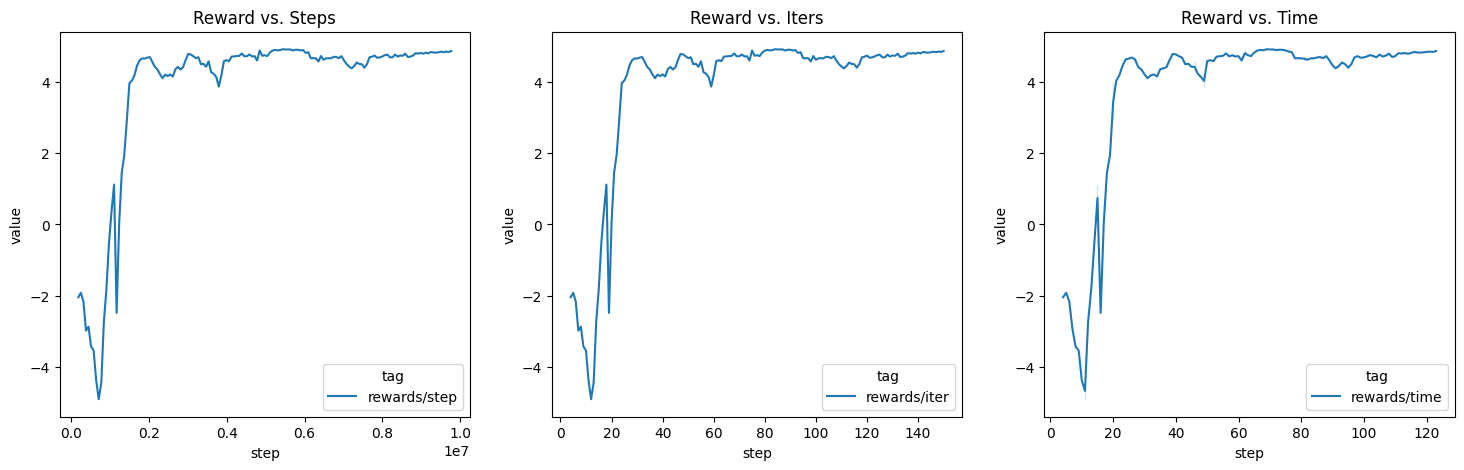

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.lineplot(ax=axes[0], data=df[df["tag"] == "rewards/step"], x='step', y='value', hue='tag')
axes[0].set_title('Reward vs. Steps')
sns.lineplot(ax=axes[1], data=df[df["tag"] == "rewards/iter"], x='step', y='value', hue='tag')
axes[1].set_title('Reward vs. Iters')
sns.lineplot(ax=axes[2], data=df[df["tag"] == "rewards/time"], x='step', y='value', hue='tag')
axes[2].set_title('Reward vs. Time')